         quantity  material_type  temperature
count   67.000000      67.000000    67.000000
mean    50.880597       4.611940    25.716418
std     33.660301       2.801273    14.725577
min      1.000000       0.000000     1.000000
25%     19.000000       2.000000    15.000000
50%     47.000000       4.000000    25.000000
75%     85.000000       6.000000    37.000000
max    100.000000      10.000000    50.000000

Enter Start Entry between 1-67: 60


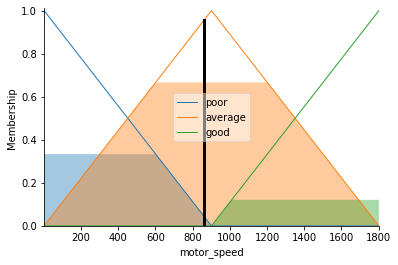

Motor Speed is :  861


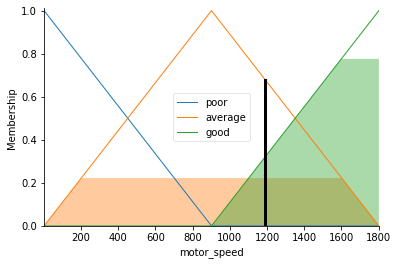

Motor Speed is :  1190


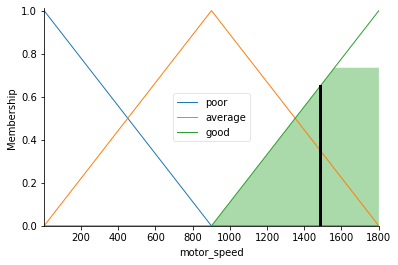

Motor Speed is :  1485


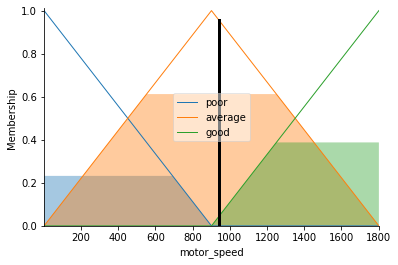

Motor Speed is :  940


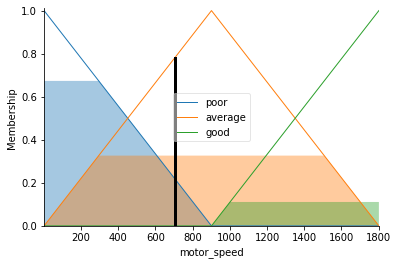

Motor Speed is :  705


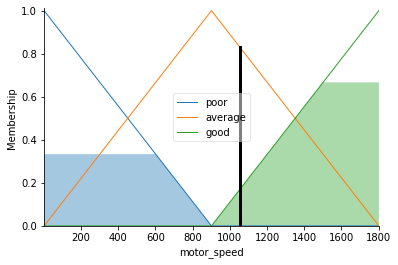

Motor Speed is :  1055


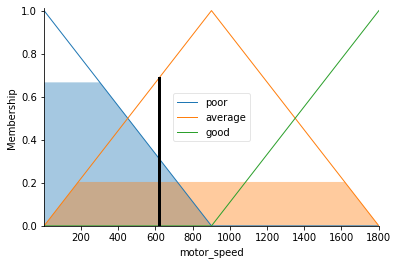

Motor Speed is :  620


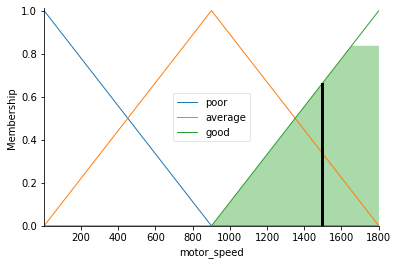

Motor Speed is :  1495


In [14]:
import numpy as np
import math
import time
import pandas as pd
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

quantity=ctrl.Antecedent(np.arange(1,101,1),'quantity')
quantity['poor']=fuzzy.trimf(quantity.universe,[1,20,40])
quantity['average']=fuzzy.trapmf(quantity.universe,[25,45,55,75])
quantity['good']=fuzzy.trimf(quantity.universe,[60,80,100])

material_type=ctrl.Antecedent(np.arange(1,11,1),'material_type')
material_type['poor']=fuzzy.trimf(material_type.universe,[1,2,4])
material_type['average']=fuzzy.trapmf(material_type.universe,[3,5,6,7])
material_type['good']=fuzzy.trimf(material_type.universe,[6,8,10])

temperature=ctrl.Antecedent(np.arange(1,51,1),'temperature')
temperature['poor']=fuzzy.trimf(temperature.universe,[1,13,25])
temperature['average']=fuzzy.trapmf(temperature.universe,[15,24,28,40])
temperature['good']=fuzzy.trimf(temperature.universe,[35,43,50])

motor_speed=ctrl.Consequent(np.arange(1,1810,10),'motor_speed')
motor_speed['poor']=fuzzy.trimf(motor_speed.universe,[1,350,700])
motor_speed['average']=fuzzy.trapmf(motor_speed.universe,[550,950,1050,1500])
motor_speed['good']=fuzzy.trimf(motor_speed.universe,[1350,1625,1800])
               
quantity.automf(3)
material_type.automf(3)
temperature.automf(3)
motor_speed.automf(3)

#quantity.view()
#material_type.view()
#temperature.view()
#motor_speed.view()
#plt.show()


rule1=ctrl.Rule(quantity['poor'] & material_type['poor'] & temperature['poor'],motor_speed['poor'])
#rule1.view()
rule2=ctrl.Rule(quantity['poor'] & material_type['poor'] & temperature['average'],motor_speed['poor'])
rule3=ctrl.Rule(quantity['poor'] & material_type['poor'] & temperature['good'],motor_speed['poor'])
rule4=ctrl.Rule(quantity['poor'] & material_type['average'] & temperature['poor'],motor_speed['poor'])
rule5=ctrl.Rule(quantity['poor'] & material_type['average'] & temperature['average'],motor_speed['average'])
rule6=ctrl.Rule(quantity['poor'] & material_type['average'] & temperature['good'],motor_speed['average'])
rule7=ctrl.Rule(quantity['poor'] & material_type['good'] & temperature['poor'],motor_speed['good'])
rule8=ctrl.Rule(quantity['poor'] & material_type['good'] & temperature['average'],motor_speed['good'])
rule9=ctrl.Rule(quantity['poor'] & material_type['good'] & temperature['good'],motor_speed['poor'])
rule10=ctrl.Rule(quantity['average'] & material_type['poor'] & temperature['poor'],motor_speed['good'])
rule11=ctrl.Rule(quantity['average'] & material_type['poor'] & temperature['average'],motor_speed['average'])
rule12=ctrl.Rule(quantity['average'] & material_type['poor'] & temperature['good'],motor_speed['poor'])
rule13=ctrl.Rule(quantity['average'] & material_type['average'] & temperature['poor'],motor_speed['average'])
rule14=ctrl.Rule(quantity['average'] & material_type['average'] & temperature['average'],motor_speed['average'])
rule15=ctrl.Rule(quantity['average'] & material_type['average'] & temperature['good'],motor_speed['poor'])
rule16=ctrl.Rule(quantity['average'] & material_type['good'] & temperature['poor'],motor_speed['good'])
rule17=ctrl.Rule(quantity['average'] & material_type['good'] & temperature['average'],motor_speed['good'])
rule18=ctrl.Rule(quantity['average'] & material_type['good'] & temperature['good'],motor_speed['average'])
rule19=ctrl.Rule(quantity['good'] & material_type['poor'] & temperature['poor'],motor_speed['average'])
rule20=ctrl.Rule(quantity['good'] & material_type['poor'] & temperature['average'],motor_speed['average'])
rule21=ctrl.Rule(quantity['good'] & material_type['poor'] & temperature['good'],motor_speed['average'])
rule22=ctrl.Rule(quantity['good'] & material_type['average'] & temperature['poor'],motor_speed['good'])
rule23=ctrl.Rule(quantity['good'] & material_type['average'] & temperature['average'],motor_speed['good'])
rule24=ctrl.Rule(quantity['good'] & material_type['average'] & temperature['good'],motor_speed['average'])
rule25=ctrl.Rule(quantity['good'] & material_type['good'] & temperature['poor'],motor_speed['good'])
rule26=ctrl.Rule(quantity['good'] & material_type['good'] & temperature['average'],motor_speed['good'])
rule27=ctrl.Rule(quantity['good'] & material_type['good'] & temperature['good'],motor_speed['poor'])

motor_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
motor_rpm = ctrl.ControlSystemSimulation(motor_ctrl)

ds = pd.read_csv("flourmill_dataset.csv")
ds.set_index("S.No", inplace = True)
print(ds.describe())
n=int(input("\nEnter Start Entry between 1-67: "))
for j in range(n,68):
    data=ds.loc[n]
    motor_rpm.input['quantity'] =data["quantity"]
    motor_rpm.input['material_type'] =data["material_type"]
    motor_rpm.input['temperature'] = data["temperature"]

    motor_rpm.compute()

    speed=math.ceil(motor_rpm.output['motor_speed'])
    motor_speed.view(sim=motor_rpm)
    plt.show()
    print("Motor Speed is : ",speed)
    time.sleep(3)
    n+=1